# Les exoplanètes : peut-on trouver des planètes habitables et exploitables ?

Cellule d'import :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

Grâce aux données compilées par les différents programmes d’exploration spatiale, nous disposons aujourd’hui d’archives contenant des quantités considérables d’information. L’objectif de notre travail est donc d’exploiter toutes ces données afin d’en donner une interprétation physique qualitative, et de comprendre comment les différents facteurs interagissent et conditionnent le caractère habitable ou non d’une planète.

Pour exploiter ces immenses tableaux de données, rien de mieux que Pandas ! De plus, si nous avions initialement tracé nos graphiques via Matplolib, nous avons décidé d’apprendre en route à utiliser Seaborn afin d’exploiter le fait que les phénomènes à considérer sont en général multifactoriels. Par exemple, la température d’une planète sera fonction de son insolation bien entendu, mais aussi du nombre d’étoiles dans son système, de la distance à ces étoiles... C’est pourquoi le choix de Seaborn nous a paru approprié.

On commencera par étudier des états caractéristiques des planètes (qui peuvent être reliés à son exploitation) puis on étudiera les conditions d'habitabilité de celles-ci.


## On commence par trier le tableau de base afin de ne garder du site que les infos qui nous intéressent

On ne traitera pas les données atmosphériques complexes d'habitabilité (on suppose possible un apport en oxygène constant grâce aux technologies) ni la présence d'eau, non mentionnées sur le site des données.

PS : on a eu affaire à un gros soucis pour avoir un tableau cohérent (>1h...) à cause du téléchargement du fichier de base qui n'était même pas directement exploitable sur excel

PPS : pl_eqt est la température de la planète en moyenne


In [3]:
df = pd.read_csv('données.csv', delimiter = ';')
df.head()

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
0,11 Com b,2,1,Radial Velocity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,NaN,93.1846
1,11 Com b,2,1,Radial Velocity,326.03000,NaN,NaN,0.231,NaN,NaN,NaN,4742.0,2.70,2.243,93.1846
2,11 Com b,2,1,Radial Velocity,323.21000,NaN,NaN,0.238,NaN,NaN,NaN,4874.0,2.09,1.978,93.1846
3,11 UMi b,1,1,Radial Velocity,516.21997,NaN,NaN,0.080,NaN,NaN,NaN,4213.0,2.78,NaN,125.3210
4,11 UMi b,1,1,Radial Velocity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,NaN,125.3210


## On va maintenant exploiter des données relativement à la Terre en taille/masse

* L'enjeu ici est d'exploiter des comparaisons vis-à-vis de la Terre pour en tirer des conclusions d'exploitation minière/de ressources

On commence par regarder sa masse et son rayon, qui permettrait d'en déduire sa densité également(et donc imaginer la composition de ses sols). 

On supprime les données NaN des rayons (en rayons terrestres) et masses (en masses terrestres) : 

In [4]:
df1 = df.dropna(subset = ['Rayon', 'Masse terrienne'])
df1.head()

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
30,1RXS J160929.1-210524 b,1,1,Imaging,NaN,18.647,2543.000,NaN,NaN,1800.0,NaN,4060.0,0.85,NaN,139.1350
39,2MASS J02192210-3925225 b,1,1,Imaging,NaN,16.141,4417.837,NaN,NaN,NaN,NaN,3064.0,0.11,-2.230,NaN
105,55 Cnc e,2,5,Radial Velocity,0.736547,1.875,7.990,0.050,NaN,NaN,83.59,5172.0,0.91,NaN,12.5855
109,55 Cnc e,2,5,Radial Velocity,0.736539,1.910,8.080,NaN,NaN,NaN,83.30,5250.0,0.90,-0.197,12.5855
112,55 Cnc e,2,5,Radial Velocity,0.736544,2.080,7.810,0.061,NaN,1958.0,87.30,5234.0,0.91,NaN,12.5855


Voyons à quoi ressemble la relation masse-rayon :

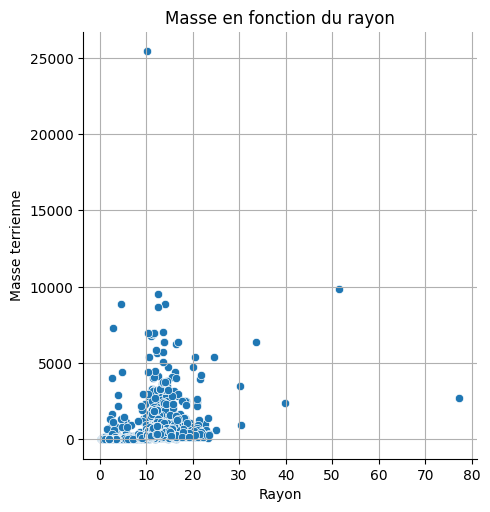

In [5]:
sns.relplot(data=df1, x='Rayon', y='Masse terrienne')
plt.title('Masse en fonction du rayon')
plt.style.use('dark_background')
plt.grid();

On remarque que le graphe n'est pas très visible, on va se limiter à un rayon de 50 rayons terrestres et une massse

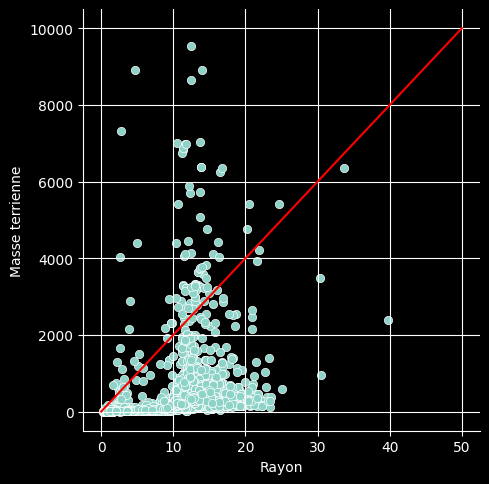

In [6]:
df1 = df1[(df1['Rayon'] < 50) & (df1['Masse terrienne'] < 10000)]
sns.relplot(data=df1, x='Rayon', y='Masse terrienne')
X = np.linspace(0, 50, 1000)
Y = np.linspace(0, 10000, 1000)
plt.plot(X,Y, '-r')
plt.grid();

On peut voir ici que les valeurs ne suivent pas une croissance linéaire, on en conclut donc qu'on a bien des compositions différentes. Les planètes ont même tendance à avoir une masse assez proche de la Terre (qui vaut 1 par définition) pour un rayon élevé plus élevé : donc moins denses.

On s'intéresse maintenant aux masses volumiques, sur une vision assez globale :

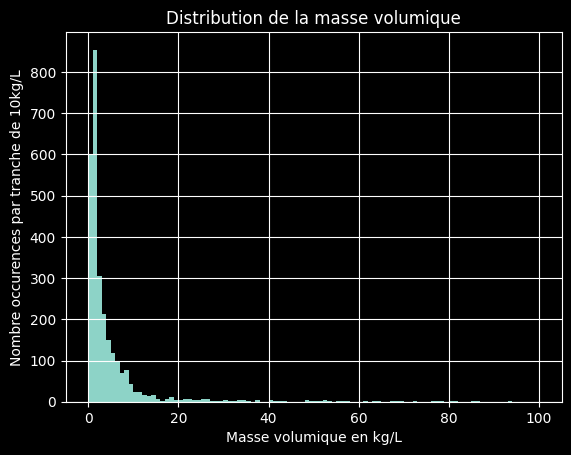

In [7]:
rayon = np.array(df1['Rayon'])*6371e3 #en mètres
masse = np.array(df1['Masse terrienne'])*6e24 #en kg
masse_vol = np.round(masse/(4/3*np.pi*rayon**3)/1000, 0) #en kg/L
plt.hist(masse_vol, range = (0, 100), bins = 100)
plt.title('Distribution de la masse volumique')
plt.xlabel('Masse volumique en kg/L')
plt.ylabel('Nombre occurences par tranche de 10kg/L')
plt.grid();

On rappelle ici que pour l'eau on a 1kg/L, pour le fer 8kg/L et en moyenne sur le Terre 5,5kg/L. On remarque donc que certaines planètes ont des masses volumiques assez élevées, ce qui peut signifier soit la présence d'anomalies dans les données de base, soit des planètes hors du commun (densités très particulières). 

On va se restreindre à des masse volumiques maximales de 25kg/L (l'élément le plus dense étant l'osmium à 23kg/L) :

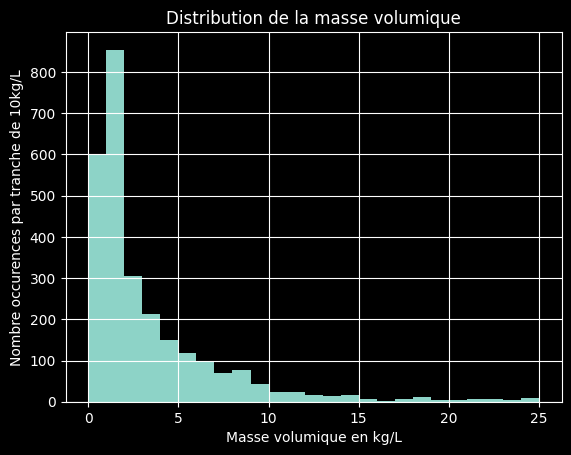

In [8]:
rayon = np.array(df1['Rayon'])*6371e3 #en mètres
masse = np.array(df1['Masse terrienne'])*6e24 #en kg
masse_vol = np.round(masse/(4/3*np.pi*rayon**3)/1000, 0) #en kg/L

plt.hist(masse_vol, range = (0, 25), bins = 25)

plt.title('Distribution de la masse volumique')
plt.xlabel('Masse volumique en kg/L')
plt.ylabel('Nombre occurences par tranche de 10kg/L')
plt.grid();

On remarque que la plupart des planètes ont une masse volumique plus faible que la Terre (synonyme soit d'une grande présence d'eau, ou alors un manque de présence d'éléments lourds). 

En effet si on calcule un peu la proportion :

In [9]:
print(np.round(len(masse_vol[masse_vol<5.5])/len(masse_vol)*100, 1), '%')

80.1 %


Nous avons donc 80% des planètes de données exploitables qui sont moins denses que la Terre. 

## Conclusion

On note que la plupart des planètes étudiées sont similaires aux proportions/masses de la Terre. De plus, si on envisage une exploration/colonisation spatiale, on aurait tendance à s'orienter vers des planètes dneses pour avoir accès à des métaux lourds/rares (20% des données exploitables), ce qui à l'inverse tend à être synonyme d'absence de vie/d'eau.

## On va maintenant exploiter des données d'orbites

* L'enjeu est ici de voir à quoi peuvent ressembler les périodes orbitales des exoplanètes pour en tirer des conclusions d'habitabilité

Tout d'abord on extrait une table de données sans NaN vis-à-vis des orbites (qui seront asssimilées aux périodes de révolution) :

In [10]:
df2 = df.dropna(subset = ['Orbite'])
df2.head()

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
1,11 Com b,2,1,Radial Velocity,326.03000,NaN,NaN,0.231,NaN,NaN,NaN,4742.0,2.70,2.243,93.1846
2,11 Com b,2,1,Radial Velocity,323.21000,NaN,NaN,0.238,NaN,NaN,NaN,4874.0,2.09,1.978,93.1846
3,11 UMi b,1,1,Radial Velocity,516.21997,NaN,NaN,0.080,NaN,NaN,NaN,4213.0,2.78,NaN,125.3210
5,11 UMi b,1,1,Radial Velocity,516.22000,NaN,NaN,0.080,NaN,NaN,NaN,4340.0,1.80,NaN,125.3210
6,14 And b,1,1,Radial Velocity,186.76000,NaN,NaN,0.000,NaN,NaN,NaN,4888.0,1.78,1.840,75.4392


Voyons d'abord la distribution des orbites (unités en jours) :

In [11]:
orbite = np.array(df2['Orbite'])
print('Orbite max :', max(orbite), 'jours')
print('Orbite min :', np.round(min(orbite), 3), 'jours')
print('Orbite moyenne :', np.round(np.mean(orbite), 0), 'jours')

Orbite max : 402000000.0 jours
Orbite min : 0.091 jours
Orbite moyenne : 13109.0 jours


Un enjeu apparait clairement ici : avoir une période de révolution trop élevée poserait problème avec une colonialisation car les êtres humains ne seraient pas capables de stocker facilement de la nourriture pendant des périodes prolongées d'hiver. 

En effet les végétaux ne pourraient pas rentrer en hibernation prolongée. On va arbitrairement estimer qu'au maximum une période hivernale (un quart de période orbitale) ne doit pas dépasser 6 mois (déjà le cas pour les pôles Nord et Sud de la terre où pas de vie pousse...)

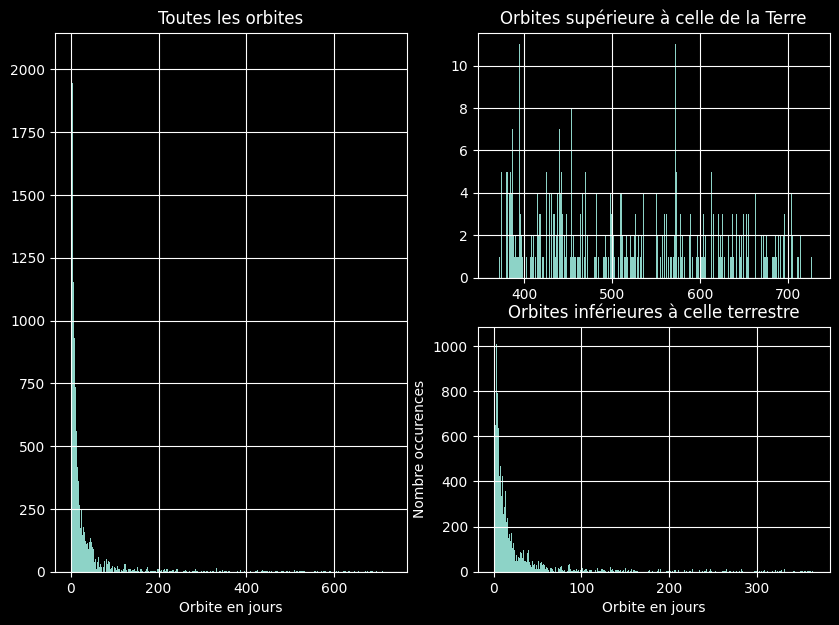

In [12]:
orbite2 = orbite[orbite < 365*2]
plt.figure(figsize = (10, 7))

plt.subplot(1, 2, 1)
plt.hist(orbite2, range = (0, 365*2), bins = 1000)
plt.title('Toutes les orbites')
plt.xlabel('Orbite en jours')
plt.grid()

plt.subplot(2, 2, 2)
plt.hist(orbite2, range = (365, 365*2), bins = 365)
plt.title('Orbites supérieure à celle de la Terre')
plt.grid()

plt.subplot(2, 2, 4)
plt.hist(orbite2, range = (0, 365), bins = 1000)
plt.title('Orbites inférieures à celle terrestre')
plt.xlabel('Orbite en jours')
plt.grid()
plt.ylabel('Nombre occurences');

On peut voir que la plupart des orbites sont inférieures à celle de la Terre, si on fait des statistiques on obtient : 

In [13]:
habitable = orbite[orbite<365*2]
inf = orbite[orbite<365] 
p1 = np.round(len(habitable)/len(orbite)*100, 1)
p2 = np.round(len(inf)/len(orbite), 1)

print('Pourcentage des exoplanètes avec orbite "vivable":', p1, '%')
print('Pourcentage des exoplanètes avec orbite plus rapide que la Terre:', p2, '%')

Pourcentage des exoplanètes avec orbite "vivable": 97.0 %
Pourcentage des exoplanètes avec orbite plus rapide que la Terre: 1.0 %


## Conclusion

D'après les études précédentes, on remarque que les conditions orbitales ne semblent pas être problématique puisque la plupart des exosplanètes semblent répondre au critère des saisons, permettant possiblement à la vie de se développer (à condition d'avoir de l'oxygène et de l'eau bien sûr... mais non étudié ici). 

Il est maintenant temps de s'intéresser aux conditions d'habitabilité.

# Étude de l'influence des étoiles entourant une exoplanète

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('données.csv', sep=';')
sns.set_style('darkgrid')

## On s'intéresse d'abord au lien entre température et nombre d'étoiles

L'idée est ici de voir s'il est intéressant de chercher une planète avec 1 seule étoile pour que la température en surface reste assez faible, ou si au contraire il est plus avantageux pour avoir uen température d'équilibre viable d'avoir plusieurs étoiles. 

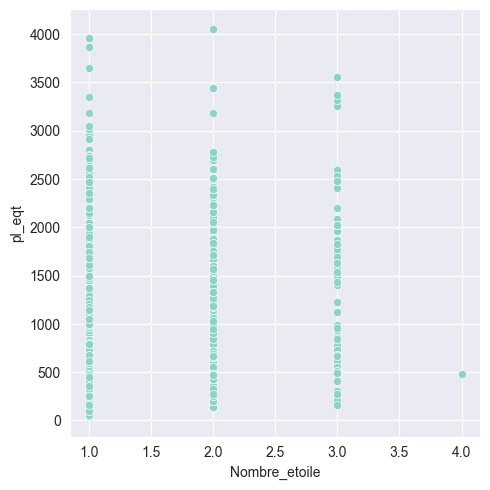

In [16]:
dh= pd.read_csv('données.csv', sep=';').dropna(subset=['pl_eqt', 'Nombre_etoile'])
sns.relplot(data=dh, x='Nombre_etoile', y='pl_eqt');

On voit ici qu'il n'y a pas de corrélation ! :(
En effet, en faisant abstraction du fait qu'il y a moins de planètes possédant 2 et surtout 3 étoiles, on voit que toutes les gammes de températures moyennes peuvent être atteintes même avec une seule étoile : ce critère n'est a priori pas discriminant pour trouver une planète viable. 

## On regarde maintenant s'il y a un lien même entre la luminosité reçue et la température moyenne

En effet, une décorrélation trop marquée entre luminosité reçue et température tendrait à montrer une composition particulière de la planète, voire la présence de l'eau. 
La chaleur finalement absorbée dépend en effet directement de la structure de la planète, et ces informations sont donc intéressantes pour la viabilité de la planète.
On trie les informations en fonction du nombre d'étoiles entourant les planètes.

In [17]:
df=df.dropna(subset=['pl_eqt', 'Nombre_etoile','Luminosité'])

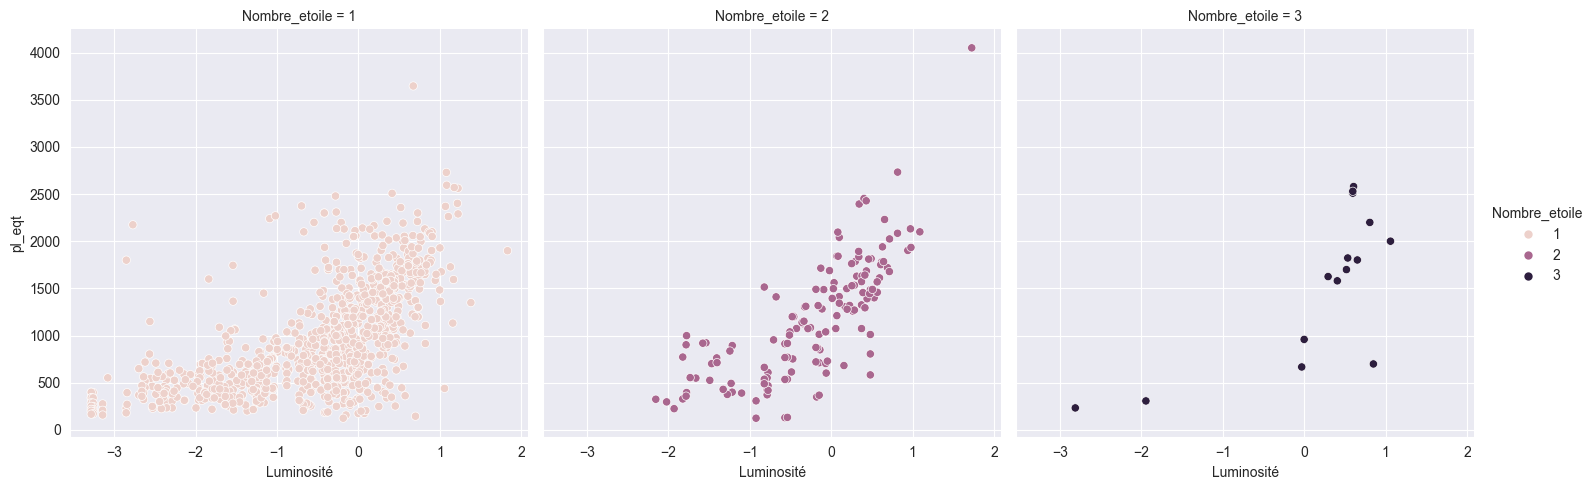

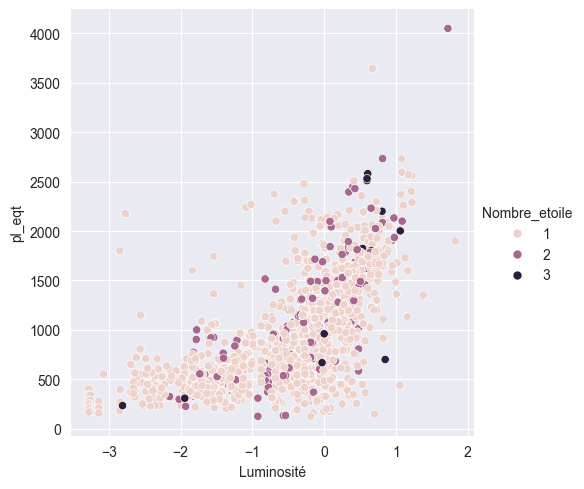

In [18]:
sns.relplot(data=df, x='Luminosité', y='pl_eqt', hue='Nombre_etoile', col='Nombre_etoile');
sns.relplot(data=df, x='Luminosité', y='pl_eqt', hue='Nombre_etoile');

On observe bien une forme de corrélation : la température semble effectivement être fonction croissante de la luminosité (celle ci étant négative à cause de la formule mettant en jeu des logarithmes).
Le nombre d'étoiles n'a pas d'influence a priori. 


## Finalement on regarde le lien entre température et insolation

On veut voir de même s'il y a un lien avec l'insolation et la température.

In [19]:
dg= pd.read_csv('données.csv', sep=';').dropna(subset=['pl_eqt', 'Insolation'])

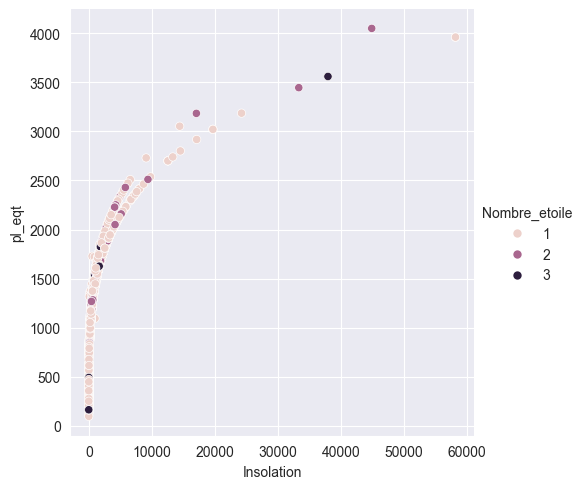

In [20]:
dg.sort_values(by=['pl_eqt'])
sns.relplot(data=dg, x='Insolation', y='pl_eqt', hue='Nombre_etoile');

On observe effectivement un lien direct entre température et insolation, en notant que la courbe est similaire à celle de luminosité/température. 
La plupart des planètes ont une insolation assez faible, proche de celle de la Terre, ce qui peut sembler avantageux. 

On étudie en particulier la luminosité apparente et la température moyenne des planètes en fonction de différents paramètres de la table de données. 

# Etude de luminosité

In [25]:
df=pd.read_csv('données.csv',delimiter=';')
import mplcyberpunk
df.head(5)

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
0,11 Com b,2,1,Radial Velocity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,NaN,93.1846
1,11 Com b,2,1,Radial Velocity,326.03000,NaN,NaN,0.231,NaN,NaN,NaN,4742.0,2.70,2.243,93.1846
2,11 Com b,2,1,Radial Velocity,323.21000,NaN,NaN,0.238,NaN,NaN,NaN,4874.0,2.09,1.978,93.1846
3,11 UMi b,1,1,Radial Velocity,516.21997,NaN,NaN,0.080,NaN,NaN,NaN,4213.0,2.78,NaN,125.3210
4,11 UMi b,1,1,Radial Velocity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,NaN,125.3210


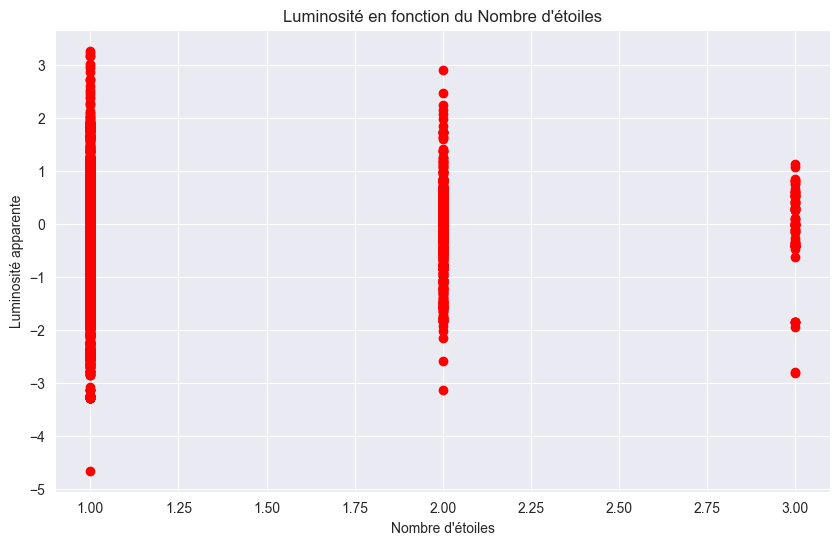

In [26]:
df1 = df.dropna(subset=['Luminosité','Nombre_etoile'])
plt.figure(figsize=(10, 6))
plt.scatter(df1['Nombre_etoile'], df1['Luminosité'], color='r', marker='o')
plt.style.use("cyberpunk")
plt.xlabel('Nombre d\'étoiles')
plt.ylabel('Luminosité apparente')
plt.title('Luminosité en fonction du Nombre d\'étoiles')
mplcyberpunk.add_glow_effects()

plt.show()

* On en déduit donc que le nombre d'étoile n'a pas influencé la luminosité apparente, on peut donc en faire abstraction également par rapport à la température. 

Le seul problème qui peut exister si on approche un système stellaire avec 3 étoiles est une contrainte de trajectoire qui modélise un problème à plus de 3 corps (difficile à établir en terme de voyage spatial)

* On peut également comparer l'éloignement de la luminosité en fonction de la distance et de l'eccentricité

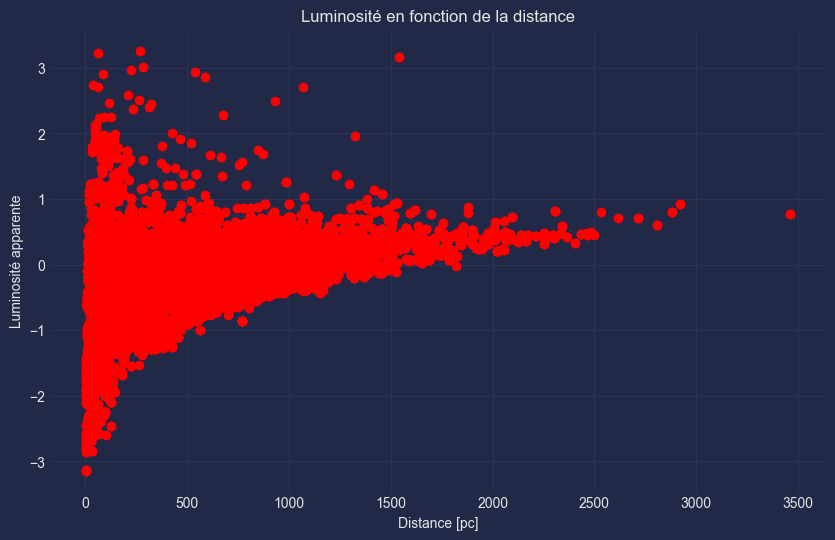

In [27]:
df2 = df.dropna(subset=['Luminosité','Distance'])
plt.figure(figsize=(10, 6))
plt.scatter(df2['Distance'], df2['Luminosité'], color='r', marker='o')
plt.xlabel('Distance [pc]')
plt.ylabel('Luminosité apparente')
plt.title('Luminosité en fonction de la distance')
plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()


plt.show()

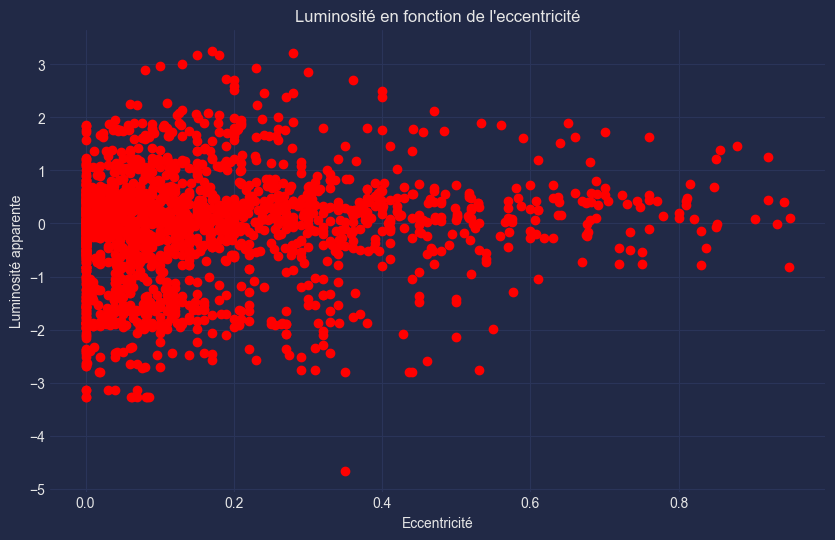

In [28]:
df3 = df.dropna(subset=['Luminosité','Eccentricité'])
plt.figure(figsize=(10, 6))
plt.scatter(df3['Eccentricité'], df3['Luminosité'], color='r', marker='o')
plt.xlabel('Eccentricité')
plt.ylabel('Luminosité apparente')
plt.title('Luminosité en fonction de l\'eccentricité')
plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()


plt.show()

* On peut paufiner les différents graphiques en rajoutant des paramètres grâce à seaborn :

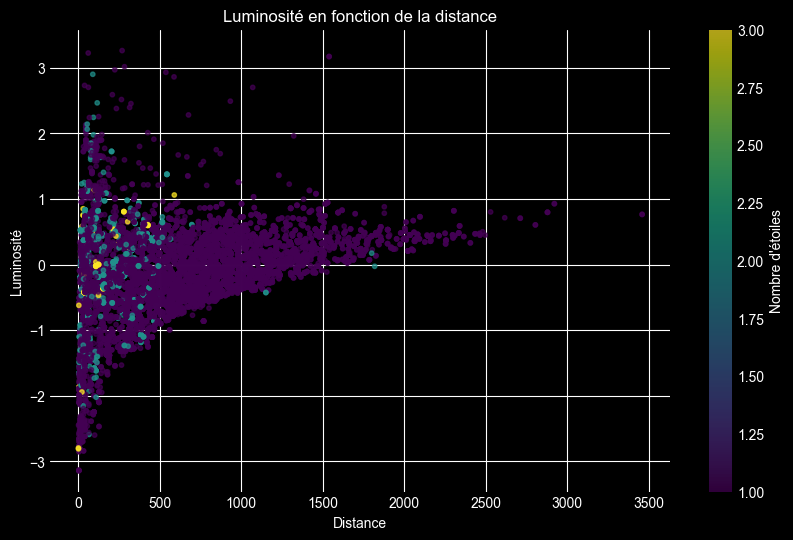

In [29]:
df4 = df.dropna(subset=['Nombre_etoile', 'Luminosité', 'Distance'])

plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df4['Distance'], df4['Luminosité'], 
                      c=df4['Nombre_etoile'], cmap='viridis', marker='o', alpha=0.7,s=10)

cbar = plt.colorbar(scatter)
cbar.set_label("Nombre d'étoiles")

plt.xlabel('Distance')
plt.ylabel('Luminosité')
plt.title('Luminosité en fonction de la distance')

plt.show()


* Et si on discrétise également le nombre d'étoiles :

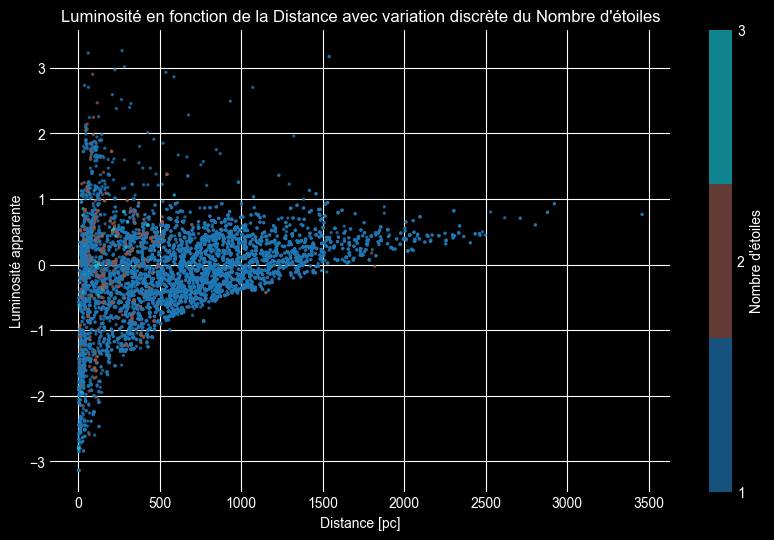

In [30]:
df5 = df.dropna(subset=['Nombre_etoile', 'Luminosité', 'Distance'])


plt.style.use('dark_background')

# Créer une palette de couleurs discrète
unique_values = df5['Nombre_etoile'].unique()
cmap = plt.get_cmap('tab10', len(unique_values)) 

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df5['Distance'], df5['Luminosité'], 
                      c=df5['Nombre_etoile'], cmap=cmap, marker='o', alpha=0.7, s=2)  

# Ajouter une barre de couleur discrète pour indiquer le 'Nombre_etoile'
cbar = plt.colorbar(scatter, ticks=range(len(unique_values)))
cbar.set_label("Nombre d'étoiles")
cbar.set_ticks(unique_values) 
cbar.set_ticklabels(unique_values)


plt.xlabel('Distance [pc]')
plt.ylabel('Luminosité apparente')
plt.title('Luminosité en fonction de la Distance avec variation discrète du Nombre d\'étoiles')


plt.show()

* On peut maintenant s'intéresser encore une fois au lien insolation-température avec un graphe plus précis :

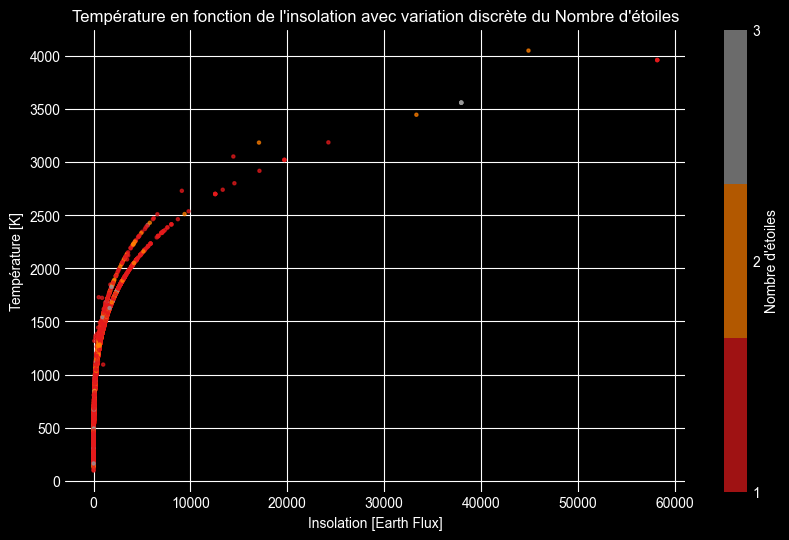

In [31]:
df6 = df.dropna(subset=['Nombre_etoile', 'pl_eqt', 'Insolation'])


plt.style.use('dark_background')

# Créer une palette de couleurs discrète
unique_values = df6['Nombre_etoile'].unique()
#cmap = plt.get_cmap('tab10', len(unique_values)) 
cmap = plt.get_cmap('Set1', 3)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df6['Insolation'], df6['pl_eqt'], 
                      c=df6['Nombre_etoile'], cmap=cmap, marker='o', alpha=0.7, s=5)  

# Ajouter une barre de couleur discrète pour indiquer le 'Nombre_etoile'
cbar = plt.colorbar(scatter, ticks=range(len(unique_values)))
cbar.set_label("Nombre d'étoiles")
cbar.set_ticks(unique_values) 
cbar.set_ticklabels(unique_values)


plt.xlabel('Insolation [Earth Flux]')
plt.ylabel('Température [K]')
plt.title('Température en fonction de l\'insolation avec variation discrète du Nombre d\'étoiles')


plt.show()

On en conclut également qu'il y a un lien de causalité entre le flux radiatif reçu et la température en surface (théorèmes énergétiques).

* Finalement on peut tenter de caractériser la distribution de température parmi les planètes

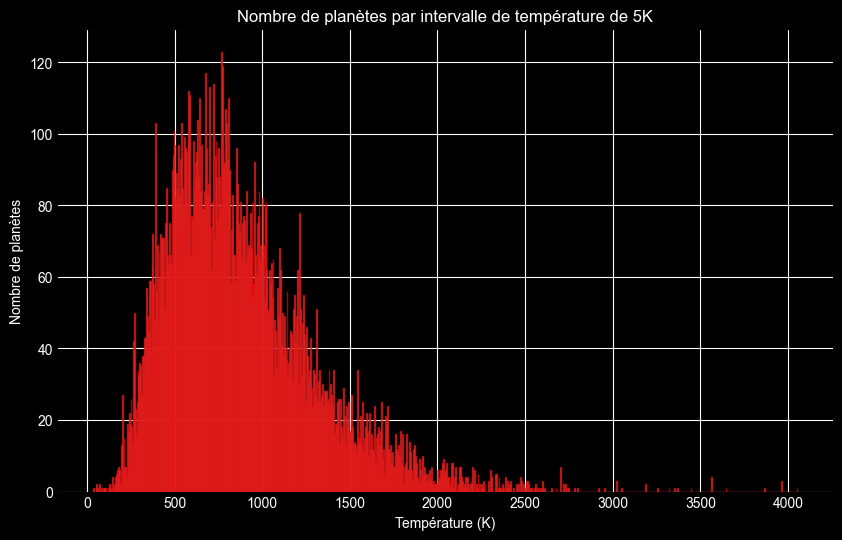

In [32]:

df7 = df.dropna(subset=['pl_eqt'])

plt.style.use('dark_background')

bin_width = 5 
min_temp = df7['pl_eqt'].min() 
max_temp = df7['pl_eqt'].max()  
bins = range(int(min_temp), int(max_temp) + bin_width, bin_width) 

plt.figure(figsize=(10, 6))
plt.hist(df7['pl_eqt'], bins=bins, color='cyan', edgecolor='red', alpha=0.7)

plt.xlabel('Température (K)')
plt.ylabel('Nombre de planètes')
plt.title('Nombre de planètes par intervalle de température de 5K')

plt.show()

# Masque d'habitabilité

Pour conclure cette étude on peut tenter d'extraire les planètes qui répondent à différentes exigeances

On va créer un masque permettant de récupérer les planètes dont la température moyenne est entre 0°C et 30°C pour avoir de bonnes conditions d'habitabilité

In [43]:
df8=df.dropna(subset=['pl_eqt'])
masque_temperature = (df8['pl_eqt'] >= 273) & (df8['pl_eqt'] <= 303)
df8_filtre = df8[masque_temperature]
print(df8_filtre.head(20))

            pl_name  Nombre_etoile  Nombre_planete         Méthode   \
522       GJ 1132 c              1               2  Radial Velocity   
869     Gliese 12 b              1               1          Transit   
2652    HD 191939 g              1               6  Radial Velocity   
4165       K2-133 e              1               4          Transit   
4363        K2-18 b              1               2          Transit   
4968         K2-3 d              1               3          Transit   
4971         K2-3 d              1               3          Transit   
5630         K2-9 b              1               1          Transit   
6169    KOI-1783.02              1               2          Transit   
6170    KOI-1783.02              1               2          Transit   
6171    KOI-1783.02              1               2          Transit   
6172    KOI-1783.02              1               2          Transit   
6279      KOI-351 h              1               8          Transit   
6281  

On va maintenant mêler ce masque à un masque permettant de garder les planètes avec une bonne période de révolution (maintenir les saisons) et insolation (pour photosynthèse) compris entre 0.5 et 2 fois celle de la Terre

In [44]:
df9_filtre = df8_filtre[ (df8_filtre['Orbite']<365*2) & (df8_filtre['Insolation'] < 2) & (df8_filtre['Insolation'] > 0.5)]
df9_filtre.head()

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
869,Gliese 12 b,1,1,Transit,12.761471,0.971,NaN,NaN,1.90,300.0,NaN,3376.0,NaN,NaN,12.2100
2652,HD 191939 g,1,6,Radial Velocity,284.000000,NaN,NaN,0.03,0.99,278.0,NaN,5348.0,0.81,-0.187,53.6089
4165,K2-133 e,1,4,Transit,26.584100,1.730,NaN,NaN,1.80,296.0,89.164,3655.0,0.46,-1.479,75.1703
4968,K2-3 d,1,3,Transit,44.559830,1.510,NaN,NaN,1.50,282.0,89.380,3896.0,0.60,NaN,44.0727
4971,K2-3 d,1,3,Transit,44.557650,1.610,NaN,NaN,1.50,300.0,NaN,NaN,NaN,NaN,44.0727


On s'en sort avec un nombre de planète à priori compatibles de :

In [45]:
len(df9_filtre)

152

# Conclusion

Nous avons donc étudié divers paramètres des exoplanètes, ce qui a permet d'en déduire différentes conditions d'habitabilité et d'exploitation de ressources. Si on met ensemble les critères les plus importants : période de révolution (pour les saisons), insolation (pour la photosynthèse et développement de la vie) et température (conditions de vie) on obtient finalement 152 planètes compatibles.

Reste à encore filtrer parmi celles-ci les exoplanètes qui ont une atmosphère vivable mais également une présence d'eau. Au dessus de ça on peut rajouter le filtre de la masse volumique afin d'obtenir une planète riche en métaux rares/lourds. Tout ça sans oublier de prendre en compte l'éloignement de la Terre à ces planètes qui n'a pas été pris en compte dans cette étude.